In [1]:
%matplotlib inline

#Bibliotecas básicas do python
import numpy as np 
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas.util.testing import assert_frame_equal
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
import math

#Bibliotecas para utilização do Prophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

#Bibliotecas para utilização das métricas do Sklearn
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Bibliotecas para uso do statsmodels
import statsmodels.api as sm
from scipy import stats

#Biblioteca para ignorar os warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Período treinamento
treinamento_start_date = '2013-04-28'
treinamento_end_date = '2018-12-31'

#Período teste 
#OBS. As datas abaixo somente serão utilizadas futuramente nos modelos de previsão para testar os algoritmos
teste_start_date = '2019-01-01'
teste_end_date = '2019-12-31'

In [3]:
# Moedas que serão utilizadas 
tickers = ['GLD']

In [4]:
# O pandas_datareader será usado para carregar os dados de treinamento do Yahoo Finance
treinamento_dataset_GLD = data.DataReader(tickers[0], 'yahoo', treinamento_start_date, treinamento_end_date)

In [5]:
# pandas_datareader para carregar os dados de teste do Yahoo Finance da moeda OURO. 
# O dataset abaixo será utilizado nos modelos de previsão
teste_dataset_GLD = data.DataReader(tickers[0], 'yahoo', teste_start_date, teste_end_date)

In [6]:
#Estabelecendo a coluna 'Close' para oa Datasets
treinamento_dataset_GLD = treinamento_dataset_GLD.drop(columns = ["Open", "High", "Low", "Volume", "Adj Close"])
teste_dataset_GLD = teste_dataset_GLD.drop(columns = ["Open", "High", "Low", "Volume", "Adj Close"])
treinamento_dataset_GLD.head()

,Close
Date,
2013-04-29,142.300003
2013-04-30,142.770004
2013-05-01,141.110001
2013-05-02,141.919998
2013-05-03,142.089996


In [7]:
#Renomeiar as colunas 
treinamento_dataset_GLD = pd.DataFrame({"ds": treinamento_dataset_GLD.index, "y": treinamento_dataset_GLD.Close})
treinamento_dataset_GLD.reset_index(drop = True, inplace = True)
treinamento_dataset_GLD.head()

,ds,y
0,2013-04-29,142.300003
1,2013-04-30,142.770004
2,2013-05-01,141.110001
3,2013-05-02,141.919998
4,2013-05-03,142.089996


In [9]:
#Renomeia as colunas 'Close' para 'y_test' e 'Date' para 'ds_test' do conjunto de teste
teste_dataset_GLD = pd.DataFrame({"ds_test": teste_dataset_GLD.index, "y_test": teste_dataset_GLD.Close})
teste_dataset_GLD.reset_index(drop = True, inplace = True)
teste_dataset_GLD.head()

,ds_test,y_test
0,2019-01-02,121.330002
1,2019-01-03,122.430000
2,2019-01-04,121.440002
3,2019-01-07,121.860001
4,2019-01-08,121.529999


In [10]:
#Previsão
prophet_model = Prophet(changepoint_prior_scale=0.05, interval_width=0.95, daily_seasonality=False)
prophet_model.fit(treinamento_dataset_GLD)

In [11]:
#Predição e criação de datas futuras
prophet_forecast = prophet_model.make_future_dataframe(periods=365, freq='D')
prophet_forecast = prophet_model.predict(prophet_forecast)

Text(60.0, 0.5, 'Preço de fechamento')

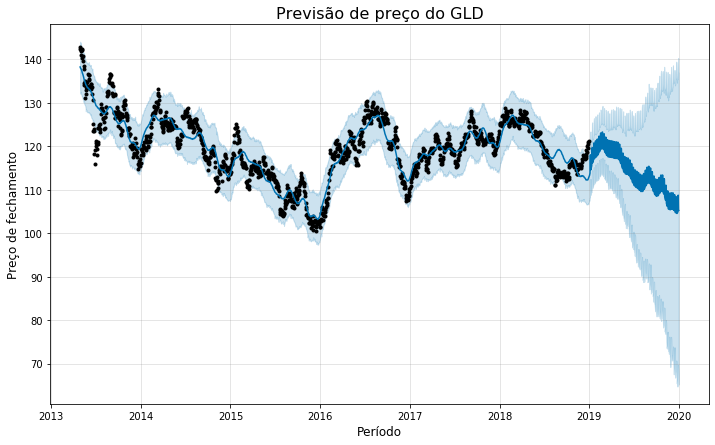

In [12]:
#Plotagem do gráfico de previsão
fig = prophet_model.plot(prophet_forecast)
ax1 = fig.gca()
ax1.set_title("Previsão de preço do GLD", fontsize=16)
ax1.set_xlabel("Período", fontsize=12)
ax1.set_ylabel("Preço de fechamento", fontsize=12)

In [13]:
#Seleciona os dados previstos apenas para o período de teste
prophet_forecast = prophet_forecast[prophet_forecast['ds'] > treinamento_end_date]
prophet_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1430,2019-01-01,117.337808,107.564337,118.778461,117.337808,117.337808,-4.237396,-4.237396,-4.237396,-1.125753,-1.125753,-1.125753,-3.111644,-3.111644,-3.111644,0.0,0.0,0.0,113.100412
1431,2019-01-02,117.316972,107.518965,119.182224,117.316972,117.316972,-4.013234,-4.013234,-4.013234,-1.125970,-1.125970,-1.125970,-2.887264,-2.887264,-2.887264,0.0,0.0,0.0,113.303738
1432,2019-01-03,117.296136,108.209903,119.187271,117.296136,117.296136,-3.726300,-3.726300,-3.726300,-1.077582,-1.077582,-1.077582,-2.648717,-2.648717,-2.648717,0.0,0.0,0.0,113.569836
1433,2019-01-04,117.275301,108.246899,119.390703,117.273930,117.275301,-3.428879,-3.428879,-3.428879,-1.030378,-1.030378,-1.030378,-2.398501,-2.398501,-2.398501,0.0,0.0,0.0,113.846422
1434,2019-01-05,117.254465,112.270924,123.230328,117.232659,117.254465,0.551743,0.551743,0.551743,2.691036,2.691036,2.691036,-2.139293,-2.139293,-2.139293,0.0,0.0,0.0,117.806208


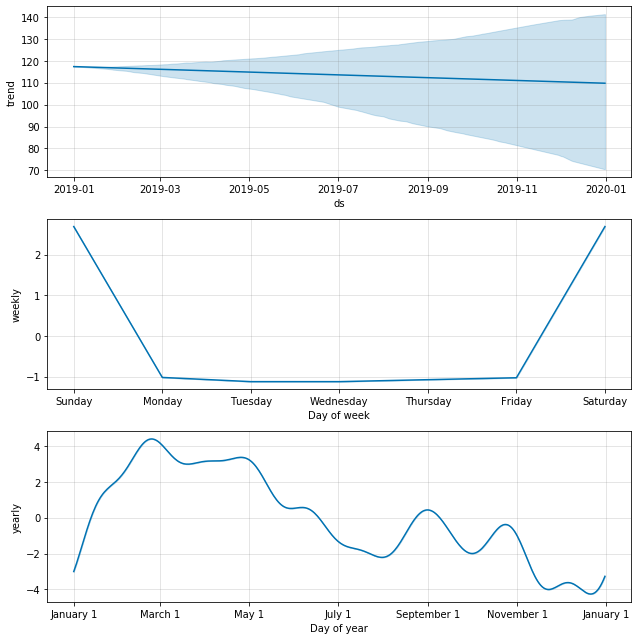

In [14]:
#Plotagem dos componententes da previsão
fig = prophet_model.plot_components(prophet_forecast)

In [15]:
#Exclusão dos fins de semana nos dados previstos
prophet_forecast = prophet_forecast[prophet_forecast['ds'].dt.dayofweek < 5]

#Exclusão dos feriados nos dados previstos
holidays = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.to_datetime(['2019-01-01','2019-01-25','2019-03-04','2019-03-05','2019-04-19','2019-05-01','2019-06-20','2019-07-09','2019-11-15','2019-11-20','2019-12-24','2019-12-25','2019-12-31']),
})

prophet_forecast = prophet_forecast[~prophet_forecast['ds'].isin(holidays['ds'])]
prophet_forecast = prophet_forecast.dropna()

In [16]:
#Escolhe as datas ('ds' e 'ds_test') como índices
prophet_forecast.set_index(prophet_forecast['ds'], inplace=True) 
teste_dataset_GLD.set_index(teste_dataset_GLD['ds_test'], inplace=True) 
treinamento_dataset_GLD.set_index(treinamento_dataset_GLD['ds'], inplace=True)

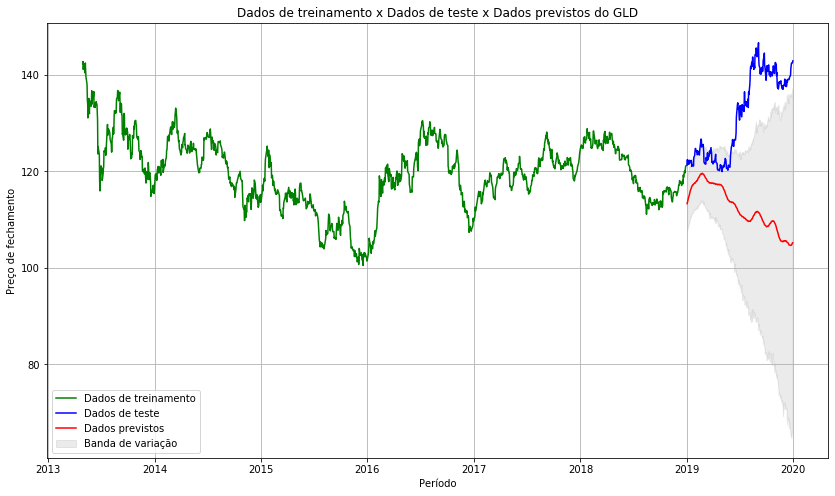

In [17]:
#Plotagem do comparativo entre o preço previsto e o dataset
n = treinamento_dataset_GLD.shape[0]
plt.figure(figsize=(14,8))
plt.title('Dados de treinamento x Dados de teste x Dados previstos do GLD')
plt.plot(treinamento_dataset_GLD['y'], 'green', label='Dados de treinamento')
plt.plot(teste_dataset_GLD['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'][-n:], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Preço de fechamento")
plt.legend()
plt.grid(True)

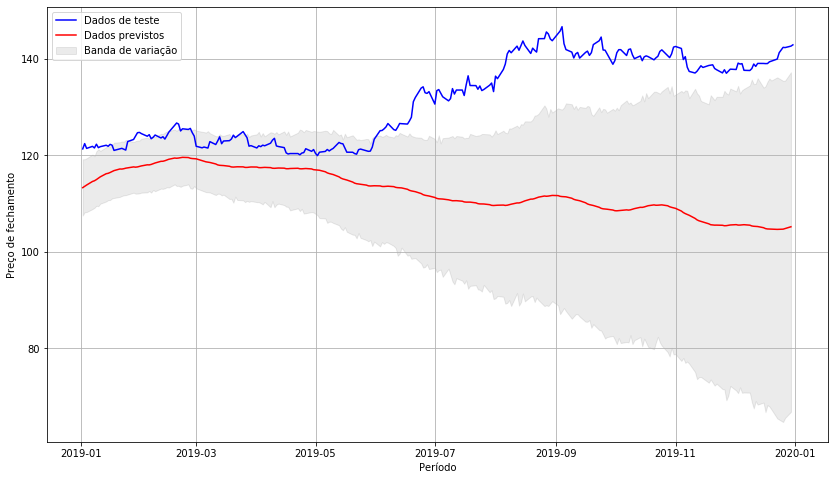

In [18]:
#Plotagem do comparativo entre o preço previsto e o preço de validação
plt.figure(figsize=(14,8))
plt.plot(teste_dataset_GLD['y_test'], color = 'blue', label='Dados de teste')
plt.plot(prophet_forecast['yhat'], color = 'red', label = 'Dados previstos')
plt.fill_between(prophet_forecast.index[-n:], prophet_forecast['yhat_lower'][-n:], prophet_forecast['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Preço de fechamento")
plt.legend()
plt.grid(True)
plt.show()